#**Problem Formulation**

**About Problem:**

* Credit scoring is a classification problem where the objective is to predict whether or not an individual will default on their credit. 

* Credit scoring is perhaps one of the most "classic" applications for predictive
modeling, to predict whether or not credit extended to an applicant will likely
result in profit or losses for the lending institution. 

There are many variations and complexities regarding how exactly credit is extended to individuals, businesses, and other organizations for various purposes (purchasing equipment, real estate, consumer items, and so on), and using various methods of credit (credit card, loan, delayed payment plan). But in all cases, the lender provides money to an individual or institution and expects to be paid back in time with interest commensurate with the risk of default.

**About Dataset:**

* age: Age of the Customers

* ed: Education Level

* employ: Work Experience

* address: Address of the Customer

* income: Yearly Income of the customer

* debtinc: Debt to Income Ratio

* creddebt: Credit to Debt ratio

* othdebt: Other debts

* default: Customer defaulted in the past (1= defaulted, 0= Never defaulted)

> Dataset Kaggle Link: https://www.kaggle.com/datasets/atulmittal199174/credit-risk-analysis-for-extending-bank-loans

**Bussiness Objectives:**

* Marketing Aspect
* Application Aspect
* Performance Aspect
* Bad Debt Management                                                                                                                                          

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import libraries**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

#**EDA**

In [28]:
#Read data from the csv file
df= pd.read_csv('/content/drive/MyDrive/bankloans.csv')

In [29]:
#display first 5 rows
print(df.head())

   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0


In [30]:
#display last 5 rows
print(df.tail())

      age  ed  employ  address  income  debtinc  creddebt   othdebt  default
1145   34   1      12       15      32      2.7  0.239328  0.624672      NaN
1146   32   2      12       11     116      5.7  4.026708  2.585292      NaN
1147   48   1      13       11      38     10.8  0.722304  3.381696      NaN
1148   35   2       1       11      24      7.8  0.417456  1.454544      NaN
1149   37   1      20       13      41     12.9  0.899130  4.389870      NaN


In [31]:
#display data shape
print(df.shape)

(1150, 9)


In [32]:
#display columns names
print(df.columns)

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')


In [33]:
#display columns datatype
print(df.dtypes)

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object


**Observation:** There are problematic data types.

In [34]:
#display number of missing values in each column
print(df.isnull().sum())

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64


**Observation:** There are 450 missing values in target column (default).

In [35]:
#display number of duplicates 
print(df.duplicated().sum())

300


**Observation:** There are 300 duplicated value that we should remove.

In [36]:
#display some useful info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB
None


In [37]:
#display statistical describtion about the data
print(df.describe())

               age           ed       employ      address       income  \
count  1150.000000  1150.000000  1150.000000  1150.000000  1150.000000   
mean     35.235652     1.695652     8.781739     8.485217    47.982609   
std       8.089961     0.927051     6.914762     6.977725    40.508814   
min      20.000000     1.000000     0.000000     0.000000    13.000000   
25%      29.000000     1.000000     3.000000     3.000000    24.000000   
50%      35.000000     1.000000     7.000000     7.000000    36.000000   
75%      41.000000     2.000000    13.000000    12.000000    56.750000   
max      56.000000     5.000000    33.000000    34.000000   446.000000   

           debtinc     creddebt      othdebt     default  
count  1150.000000  1150.000000  1150.000000  700.000000  
mean     10.063391     1.605111     3.103844    0.261429  
std       6.584288     2.135967     3.529273    0.439727  
min       0.100000     0.011696     0.045584    0.000000  
25%       5.200000     0.415584     1.

In [38]:
#display unique values in target column with the no of each one
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

**Observations:** There is unbalanced data problem because one class (0) has significantly more samples than the other class (1).

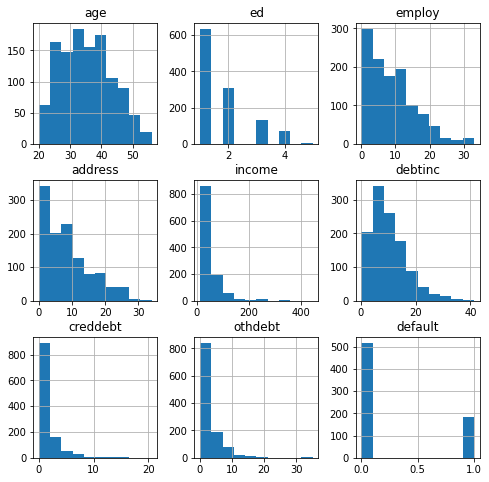

In [39]:
#display data distribution
df.hist(figsize=(8,8));

**Observations:** 

* Most of columns have Right-Skewed (Positive skewness).
* It seems that some columns have outliers we should check & deal with them.


#**Fix Data Problems:**

1) Removing Duplicated data

2) Dealing with missing values

3) Solving problematic data types

4) Dealing with outliers

5) Dealing with unbalanced data problem (Done after splitting the data).

6) Solving skewed data problem and rescaling it (Done after splitting the data).


 

###1) Duplicates

Duplicates existing in data can have several disadvantages, including:

* Inaccurate analysis: Duplicates can bias the analysis of the data by inflating the count of certain observations, leading to inaccurate statistics and conclusions.

* Wasted resources: Duplicates can also waste valuable resources, such as storage space, processing time, and memory.

* Reduced model performance: Duplicates can have a negative impact on model performance by causing overfitting and reducing the effectiveness of predictive models.

* Misleading insights: Duplicates can also lead to misleading insights and misinterpretations of the data, which can ultimately result in poor decision making.

* Data inconsistency: If duplicates exist in one part of the data, but not in another, it can create inconsistencies and problems in the data integration process.

Therefore, it is important to identify and remove duplicates from the data before performing any analysis or modeling to ensure accurate and reliable results.

In [40]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [41]:
#check for any duplicates
df.duplicated().any()

False

**Observation:** Duplicated data has been removed successfully. ❤

###2) Missing Values

Missing values can also have several disadvantages, including:

* Bias in statistical analysis: If missing values are not handled properly, they can bias the statistical analysis and lead to inaccurate results.

* Reduced sample size: If missing values are not properly handled, it can result in a reduced sample size, which can limit the ability to perform certain statistical tests and model building.

* Increased uncertainty: Missing values can also increase the uncertainty and variability of the data, which can negatively impact model performance and lead to unreliable insights.

* Reduced data quality: Missing values can also reduce the overall quality of the data, making it less useful and less reliable for decision making.

* Data inconsistency: Missing values can also create inconsistencies and problems in the data integration process, especially when merging data from multiple sources.

Therefore, it is important to properly handle missing values by either imputing them with appropriate values or removing the observations with missing values before performing any analysis or modeling.


*There are many effictive techniques to deal with missing values, including:*

* Dropping missing values

* Mean/median/mode imputation

* Forward/Backward Fill

* Imputation methods: include regression imputation, k-nearest neighbors (KNN) imputation, and multiple imputation.

* Predictive modeling: A model can be trained to predict missing values based on the other available features in the dataset.

* Domain knowledge: Depending on the context of the data

* Manual data entry

* Data augmentation

**In our case,** I will choose Predictive modeling technique and use Random Forest algorithm to predict the missing values based on the rest of data ; as I have small number of data as the following.

In [42]:
# Split the dataset into two parts: rows with missing data and rows without missing data
df_missing = df[df['default'].isnull()]
df_not_missing = df[~df['default'].isnull()]

# Split the dataset with no missing values into features and target
X_train = df_not_missing.drop('default', axis=1)
y_train = df_not_missing['default']

# Train a random forest classifier to predict missing values in the target column
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Use the trained classifier to predict missing values in the target column
X_missing = df_missing.drop('default', axis=1)
df_missing['default'] = rf.predict(X_missing)

# Concatenate the two parts of the dataset back together
df = pd.concat([df_not_missing, df_missing])

<ipython-input-42-fad1766a7701>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['default'] = rf.predict(X_missing)


In [43]:
# Check if there are any remaining missing values
missing_values_exist = df['default'].isnull().any()
missing_values_exist

False

**Observation:** Missing values have been filled successfully. ❤

In [44]:
#After filling the missing values, we should check again for unbalanced data problem 
df['default'].value_counts()

0.0    643
1.0    207
Name: default, dtype: int64

**Observation:** The unbalanced data problem still exists after filling missing values.

###3) Data Types

In [45]:
# convert 'default' column to integer type
df['default'] = df['default'].astype(int)

**Observation:** Now all columns have appropriate data types. ❤

###4) Outliers

In the case of credit risk analysis, it may be helpful to consider alternative techniques for handling outliers beyond simply removing them.
There are some useful techniques to deal with outliers including:

* **Transforming the data:** Such as the log or square root, to normalize the distribution and reduce the impact of extreme values.

* **Using robust statistical methods:** For example, instead of using the mean to summarize the data, one can use the median, which is less affected by outliers. Other robust statistical methods include trimmed means, which involve removing a fixed proportion of the extreme values, and Winsorization, which involves replacing extreme values with less extreme ones.

* **Applying machine learning algorithms:** Such as decision trees and random forests, are less sensitive to outliers than others and used to identify and handle outliers in the data.

**Hint** We already will use random forest algorithm that can handle outliers and should consider asking field experts about the nature of these values to deal with them efficiently.

###**Split Data**

In [46]:
# extract the feature matrix X and target variable y
X = df.drop('default', axis=1)
y = df['default']

In [47]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###5) Unbalanced Data

Random over-sampling is a technique used to address the problem of imbalanced datasets by increasing the number of instances in the minority class. 

This technique involves randomly duplicating examples from the minority class in the training dataset until the size of the minority class is proportional to the majority class. 

This can help to balance the distribution of the classes and improve the performance of a machine learning model in predicting the minority class.

* The **RandomOverSampler** object randomly samples the minority class to match the number of samples in the majority class.

* The **fit_resample()** method applies the over-sampling and returns the resampled feature matrix (X_resampled) and target variable.

**Important Hint**

* It is best to oversample data after splitting it into train and test sets because it helps prevent the model from overfitting to the training data. If oversampling is performed on the entire dataset before splitting, it can cause data leakage, where information from the test set leaks into the training set and artificially inflates model performance.

* When oversampling is performed only on the training set, the model is forced to learn from the existing data and generate new data based on the existing distribution, rather than simply memorizing the existing data. This can result in a more robust and generalizable model that performs well on new, unseen data.

* Additionally, oversampling after splitting the data ensures that the evaluation of the model's performance is not biased by the oversampling technique. By evaluating the model on the original, unmodified test set, we can obtain a more accurate estimate of its true performance on new, unseen data.

In [48]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate a random over-sampler object
ros = RandomOverSampler()

# Resample the data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [49]:
#check increasing the number of instances in the minority class
y_train_resampled.value_counts()

1    517
0    517
Name: default, dtype: int64

**Observation:** Data has become balanced. ❤

###6) Scaling Data

By standardizing the data (i.e., scaling it to have zero mean and unit variance), we can ensure that the features are on the same scale and avoid giving undue importance to one feature over another.

Here are some situations where data scaling is necessary:

* **When the features in the dataset have different ranges:** for example, logistic regression, are sensitive to the range of the input features. If the range of the features is not similar, then the model will give more weight to features with larger values, which may lead to inaccurate predictions.

* **When the features have different units of measurement:** then scaling is necessary to make the features comparable.

* **When using distance-based algorithms:** such as k-nearest neighbors and clustering, are sensitive to the scale of the data. If the data is not scaled, then features with larger ranges will dominate the distance measure and may lead to incorrect predictions.

* **When using gradient descent algorithms:** Gradient descent algorithms, such as logistic regression and neural networks, converge faster on normalized data.

* **When the data contains outliers:** Outliers can affect the mean and standard deviation of the feature, leading to poor model performance. Scaling the data can reduce the impact of outliers.

Overall, scaling the data helps to improve the performance of the machine learning model and make the features more comparable.






In [50]:
# create the RobustScaler object
scaler = RobustScaler()

**Important Hint**

There are 2 times possible when we want to scale data (Befor or After Splitting it):

* If we scale the entire dataset before splitting, we risk introducing data leakage where information from the test set leaks into the training set. This can lead to overestimating the performance of the model on the test set, and in turn, can result in poor generalization performance.

* Therefore, it is recommended to fit the scaling object on the training data, and then use it to transform both the training and test data separately after splitting.

In [51]:
# fit the scaler on the training set
scaler.fit(X_train_resampled)

RobustScaler()

In [52]:
# transform the training set
X_train_scaled = scaler.transform(X_train_resampled)

In [53]:
# transform the test set
X_test_scaled = scaler.transform(X_test)

To check if the data is scaled after applying Rubost Scaler technique, we can use the following steps:



In [54]:
#Convert the scaled data to a pandas DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

In [55]:
#Check the mean and standard deviation of each column in the scaled data
print(X_scaled_df.mean())
print(X_scaled_df.std())

age         0.106625
ed          0.815280
employ      0.160757
address     0.213948
income      0.391215
debtinc     0.135155
creddebt    0.448546
othdebt     0.336226
dtype: float64
age         0.694813
ed          0.995497
employ      0.744735
address     0.735870
income      1.182831
debtinc     0.741493
creddebt    1.374256
othdebt     1.165057
dtype: float64


**Observation:** The mean of each column is close to zero and the standard deviation is close to one, then the data has been successfully scaled. ❤

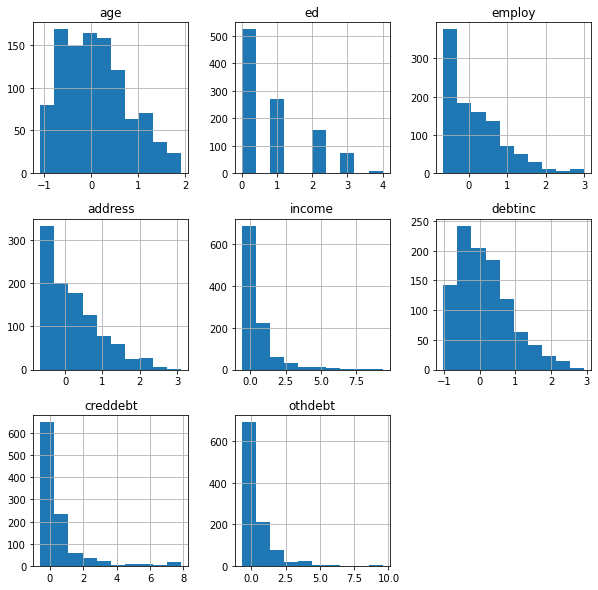

In [56]:
#Check the distribution of each column by creating a histogram
X_scaled_df.hist(figsize=(10, 10))
plt.show()

**Observation:** Data has been Scaled sucessfully. ❤

#**Model selection**

Here we should select the appropriate models that suit our problem, and I found that gradient descent, bagging and boosting algorithms are the best in our case because they are popular choices for credit risk analysis and have been shown to perform well in various studies and applications.

1) **Logistic regression** is a statistical model that is commonly used for binary classification problems, which makes it an appropriate choice for credit risk analysis, where the goal is to predict whether a loan applicant will default or not. It's also relatively easy to interpret and explain the results of a logistic regression model.

2) **Bagging** is a method that involves creating multiple copies of the training data, fitting a model to each copy, and then combining the results to make predictions. Bagging can be effective in reducing the variance of a model and improving its performance. This is especially useful in credit risk analysis, where the dataset may be imbalanced (as our case is) or noisy.

3) **Boosting** is a method that involves creating a sequence of weak models and combining them to create a strong model. Boosting can be effective in reducing the bias of a model and improving its accuracy. 

4) **Neural Networks** are well-suited to credit risk analysis because they are capable of learning complex and non-linear relationships between variables. They can also handle missing or incomplete data, which is common in credit risk analysis, and can make accurate predictions even when there is a high degree of noise or uncertainty in the data.



#**Model Training**

Here we will train our choised algorithms which they are:

1) Logistic Regression (Gradient descent algorithm)

2) Random Forest (Bagging algorithm)

3) XGBoost (Boosting algorithm)

4) Gradient Boosting (Boosting algorithm)

5) Neural Networks (Gradient descent algorithm)

In [57]:
# Define the machine learning models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

In [58]:
# Train and test the models
models = [logreg, rf, xgb, gbc]

from tabulate import tabulate

headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
rows = []

for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    rows.append([type(model).__name__, f"{acc:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"])
    
table = tabulate(rows, headers=headers, tablefmt='orgtbl')
print(table)


| Model                      |   Accuracy |   Precision |   Recall |   F1-Score |
|----------------------------+------------+-------------+----------+------------|
| LogisticRegression         |       0.75 |        0.51 |     0.77 |       0.61 |
| RandomForestClassifier     |       0.83 |        0.69 |     0.61 |       0.65 |
| XGBClassifier              |       0.82 |        0.68 |     0.61 |       0.64 |
| GradientBoostingClassifier |       0.82 |        0.63 |     0.73 |       0.67 |


**Results Explanation**

From these results, we can see that all the models have decent performance with accuracy ranging from 0.75 to 0.83. The best performing model in terms of accuracy is the RandomForestClassifier with an accuracy of 0.83. However, it has a lower recall compared to other models which means that it may not be able to correctly identify all the positive cases of credit default. On the other hand, the GradientBoostingClassifier has the highest recall score of 0.73, which means that it can correctly identify a higher percentage of the positive cases, but its precision score is relatively low which means that it may misclassify some of the negative cases as positive. The other models have a more balanced performance in terms of precision and recall.

**Now the time to see the Neural Networks performance** 😃

In [67]:
# create a sequential model
model = Sequential()

# add input layer 
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# add a hidden layer
model.add(Dense(32, activation='relu'))

# add a hidden layer
model.add(Dense(16, activation='relu'))

# add a hidden layer
model.add(Dense(8, activation='relu'))

# add output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# train the model on training data
history = model.fit(X_train_scaled, y_train_resampled, epochs=30, batch_size=8, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}')


Epoch 1/30
130/130 [==============================] - 2s 5ms/step - loss: 0.5527 - accuracy: 0.7215 - val_loss: 0.5078 - val_accuracy: 0.7412
Epoch 2/30
130/130 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.7930 - val_loss: 0.4781 - val_accuracy: 0.7353
Epoch 3/30
130/130 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8191 - val_loss: 0.4903 - val_accuracy: 0.7353
Epoch 4/30
130/130 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8279 - val_loss: 0.4431 - val_accuracy: 0.8000
Epoch 5/30
130/130 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8337 - val_loss: 0.4746 - val_accuracy: 0.7706
Epoch 6/30
130/130 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8472 - val_loss: 0.4724 - val_accuracy: 0.7824
Epoch 7/30
130/130 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.8424 - val_loss: 0.4644 - val_accuracy: 0.7824
Epoch 

*Visualize the results*

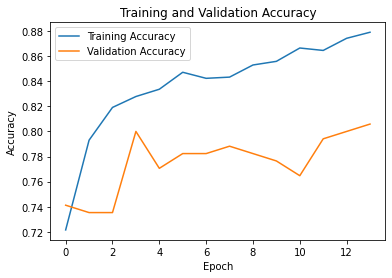

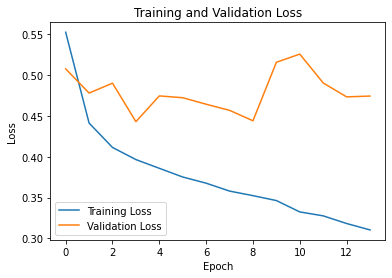

In [68]:
# Extract training and validation accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy over each epoch
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
#clear session
keras.backend.clear_session()

Here are some specific observations we can make based on the results we obtained:

* The model's training accuracy starts at 72% and gradually increases to 87% after 14 epochs.

* The model's validation accuracy also increases at the beginning of the training but starts to plateau around epoch 9 and doesn't improve much beyond that.

* The model's training loss decreases gradually during training from 0.55 to 0.31.

* The model's validation loss fluctuates a bit but generally follows the same trend as the training loss and ends up at 0.47.

* The model's test accuracy is 80.6%, which is somewhere between the training accuracy and the validation accuracy, suggesting that the model is not overfitting or underfitting too much.